In [1]:
# Standard module imports
import numpy as np
import scipy.stats as stats
import pandas as pd

%matplotlib inline

# Useful directories
gh_dir = '/Users/ttshimiz/Github/'
sed_fit_dir = gh_dir + 'bat-agn-sed-fitting/'
casey_dir = sed_fit_dir + 'analysis/casey_bayes_results/'
data_dir = gh_dir + 'bat-data/'

import sys
sys.path.append(gh_dir+'linmix/')
import linmix

In [2]:
# Setup the figures
execfile('../code/figure-setup.py')

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [18]:
# Upload the fitting results for each model
bat_casey = pd.read_csv('../data/bat-agn-c12-params.csv', index_col=0)

bat_decompir = pd.read_csv('../data/bat-agn-decompir-params.csv', index_col=0)
bat_dale14 = pd.read_csv('../data/bat-agn-d14-params.csv', index_col=0)

# Remove 'bad' sources
bad_sources = np.array(['PICTORA', '3C111.0', '3C120',
                        '2MASXJ23272195+1524375', 'PKS2331-240',
                        'HB890241+622', 'Mrk3'])
bat_casey = bat_casey.drop(bad_sources)
bat_decompir = bat_decompir.drop(bad_sources)
bat_dale14 = bat_dale14.drop(bad_sources[:-1])

# Upload the info for the BAT AGN (i.e. AGN type, luminosity distance, redshift, etc)
bat_info = pd.read_csv(data_dir+'bat_info.csv', index_col=0)

In [19]:
bat_agn_frac = pd.DataFrame(index = bat_casey.index)
bat_agn_frac['agnfracc12'] = bat_casey['agn_frac']
bat_agn_frac['agnfracc12_err_up'] = np.sqrt(bat_casey['agn_frac_err_high']**2 + 0.1**2)
bat_agn_frac['agnfracc12_err_down'] = np.sqrt(bat_casey['agn_frac_err_low']**2 + 0.1**2)
bat_agn_frac['agnfracc12_flag'] = bat_casey['agn_frac_flag']
bat_agn_frac['agnfracdecompir'] = bat_decompir['agn_frac']
bat_agn_frac['agnfracdecompir_err_up'] = bat_decompir['agn_frac_err_high']
bat_agn_frac['agnfracdecompir_err_down'] = bat_decompir['agn_frac_err_low']
bat_agn_frac['agnfracdecompir_flag'] = bat_decompir['agn_frac_flag']
bat_agn_frac['agnfracd14'] = bat_dale14['agn_frac']
bat_agn_frac['agnfracd14_err_up'] = bat_dale14['agn_frac_err_high']
bat_agn_frac['agnfracd14_err_down'] = bat_dale14['agn_frac_err_low']
bat_agn_frac['agnfracd14_flag'] = bat_dale14['agn_frac_flag']
#bat_agn_frac = bat_agn_frac.dropna()

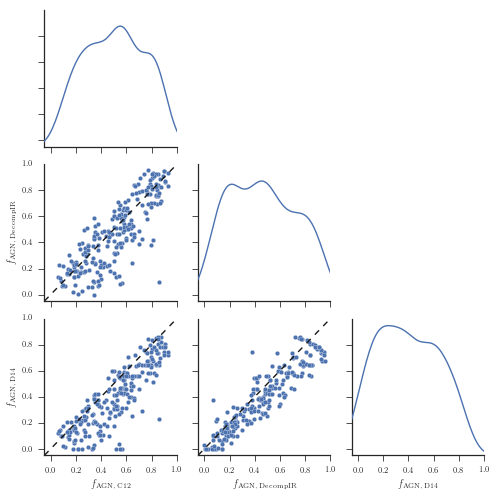

In [13]:
# Plot the correlation between each LIR using seaborn's pairplot method
g = sn.pairplot(bat_agn_frac, diag_kind="kde", size=textwidth/3., aspect=1.)
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

for i,ax in enumerate(g.axes[-1,:]):
    if i == 0:
        ax.xaxis.set_label_text(r'$f_{\rm AGN,\,C12}$')
    elif i == 1:
        ax.xaxis.set_label_text(r'$f_{\rm AGN,\,DecompIR}$')
    elif i == 2:
        ax.xaxis.set_label_text(r'$f_{\rm AGN,\,D14}$')

for i,ax in enumerate(g.axes[:,0]):
    if i == 0:
        ax.yaxis.set_label_text('')
        ax.yaxis.set_ticklabels([])
    elif i == 1:
        ax.yaxis.set_label_text(r'$f_{\rm AGN,\,DecompIR}$')
    elif i == 2:
        ax.yaxis.set_label_text(r'$f_{\rm AGN,\,D14}$')
        
for i, j in zip(*np.tril_indices_from(g.axes, 1)):
    g.axes[i,j].set_xlim(-0.05, 1.0)
    g.axes[i,j].xaxis.set_ticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    g.axes[i,j].set_ylim(-0.05, 1.0)
    if i != j:
        g.axes[i,j].plot(np.arange(-0.05, 1.01, 0.001), np.arange(-0.05, 1.01, 0.001), 'k--')
g.fig.savefig(figsave_dir+'agn_frac-comparison.pdf', bbox_inches='tight')

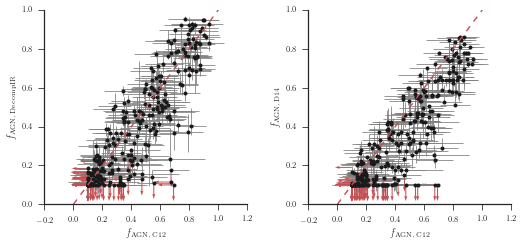

In [20]:
fig = plt.figure(figsize=(1.2*textwidth, 1/2.*textwidth))
ind1 = (bat_agn_frac['agnfracc12_flag'] == 0) & (bat_agn_frac['agnfracdecompir_flag'] == 0)
ind2 = (bat_agn_frac['agnfracc12_flag'] == -1) & (bat_agn_frac['agnfracdecompir_flag'] == 0)
ind3 = (bat_agn_frac['agnfracc12_flag'] == 0) & (bat_agn_frac['agnfracdecompir_flag'] == -1)
ind4 = (bat_agn_frac['agnfracc12_flag'] == -1) & (bat_agn_frac['agnfracdecompir_flag'] == -1)

ax1 = fig.add_subplot(121)
ax1.errorbar(bat_agn_frac['agnfracc12'][ind1], bat_agn_frac['agnfracdecompir'][ind1],
             xerr=np.vstack([bat_agn_frac['agnfracc12_err_down'][ind1], bat_agn_frac['agnfracc12_err_up'][ind1]]),
             yerr=np.vstack([bat_agn_frac['agnfracdecompir_err_down'][ind1], bat_agn_frac['agnfracdecompir_err_up'][ind1]]),
             fmt='o', color='k', ls='None', ecolor='grey', elinewidth=0.8, markersize=4)
ax1.errorbar(bat_agn_frac['agnfracc12'][ind2], bat_agn_frac['agnfracdecompir'][ind2],
             yerr=np.vstack([bat_agn_frac['agnfracdecompir_err_down'][ind2], bat_agn_frac['agnfracdecompir_err_up'][ind2]]),
             fmt='o', color='k', ls='None', ecolor='grey', elinewidth=0.8, markersize=4)
ax1.quiver(bat_agn_frac['agnfracc12'][ind2], bat_agn_frac['agnfracdecompir'][ind2], -np.ones(sum(ind2)), np.zeros(sum(ind2)),
           scale_units='width', scale=12, units='height', width=0.005, color='r', pivot='tail')
ax1.errorbar(bat_agn_frac['agnfracc12'][ind3], bat_agn_frac['agnfracdecompir'][ind3],
             xerr=np.vstack([bat_agn_frac['agnfracc12_err_down'][ind3], bat_agn_frac['agnfracc12_err_up'][ind3]]),
             fmt='o', color='k', ls='None', ecolor='grey', elinewidth=0.8, markersize=4)
ax1.quiver(bat_agn_frac['agnfracc12'][ind3], bat_agn_frac['agnfracdecompir'][ind3], np.zeros(sum(ind3)), -np.ones(sum(ind3)),
           scale_units='height', scale=12, units='width', width=0.005, color='r', pivot='tail')
ax1.plot(bat_agn_frac['agnfracc12'][ind4], bat_agn_frac['agnfracdecompir'][ind4], 'ko', ms=4)
ax1.quiver(bat_agn_frac['agnfracc12'][ind4], bat_agn_frac['agnfracdecompir'][ind4], np.zeros(sum(ind4)), -np.ones(sum(ind4)),
           scale_units='height', scale=12, units='width', width=0.005, color='r', pivot='tail')
ax1.quiver(bat_agn_frac['agnfracc12'][ind4], bat_agn_frac['agnfracdecompir'][ind4], -np.ones(sum(ind4)), np.zeros(sum(ind4)),
           scale_units='height', scale=12, units='width', width=0.005, color='r', pivot='tail')
ax1.plot(np.arange(0.0, 1.0, 0.001), np.arange(0.0, 1.0, 0.001), 'r--')
ax1.set_xlabel(r'$f_{\rm AGN,\,C12}$')
ax1.set_ylabel(r'$f_{\rm AGN,\,DecompIR}$')

ax2 = fig.add_subplot(122)
ind1 = (bat_agn_frac['agnfracc12_flag'] == 0) & (bat_agn_frac['agnfracd14_flag'] == 0)
ind2 = (bat_agn_frac['agnfracc12_flag'] == -1) & (bat_agn_frac['agnfracd14_flag'] == 0)
ind3 = (bat_agn_frac['agnfracc12_flag'] == 0) & (bat_agn_frac['agnfracd14_flag'] == -1)
ind4 = (bat_agn_frac['agnfracc12_flag'] == -1) & (bat_agn_frac['agnfracd14_flag'] == -1)

ax2.errorbar(bat_agn_frac['agnfracc12'][ind1], bat_agn_frac['agnfracd14'][ind1],
             xerr=np.vstack([bat_agn_frac['agnfracc12_err_down'][ind1], bat_agn_frac['agnfracc12_err_up'][ind1]]),
             yerr=np.vstack([bat_agn_frac['agnfracd14_err_down'][ind1], bat_agn_frac['agnfracd14_err_up'][ind1]]),
             fmt='o', color='k', ls='None', ecolor='grey', elinewidth=0.8, markersize=4)
ax2.errorbar(bat_agn_frac['agnfracc12'][ind2], bat_agn_frac['agnfracdecompir'][ind2],
             yerr=np.vstack([bat_agn_frac['agnfracd14_err_down'][ind2], bat_agn_frac['agnfracd14_err_up'][ind2]]),
             fmt='o', color='k', ls='None', ecolor='grey', elinewidth=0.8, markersize=4)
ax2.quiver(bat_agn_frac['agnfracc12'][ind2], bat_agn_frac['agnfracd14'][ind2], -np.ones(sum(ind2)), np.zeros(sum(ind2)),
           scale_units='width', scale=12, units='height', width=0.005, color='r', pivot='tail')
ax2.errorbar(bat_agn_frac['agnfracc12'][ind3], bat_agn_frac['agnfracd14'][ind3],
             xerr=np.vstack([bat_agn_frac['agnfracc12_err_down'][ind3], bat_agn_frac['agnfracc12_err_up'][ind3]]),
             fmt='o', color='k', ls='None', ecolor='grey', elinewidth=0.8, markersize=4)
ax2.quiver(bat_agn_frac['agnfracc12'][ind3], bat_agn_frac['agnfracd14'][ind3], np.zeros(sum(ind3)), -np.ones(sum(ind3)),
           scale_units='height', scale=12, units='width', width=0.005, color='r', pivot='tail')
ax2.plot(bat_agn_frac['agnfracc12'][ind4], bat_agn_frac['agnfracd14'][ind4], 'ko', ms=4)
ax2.quiver(bat_agn_frac['agnfracc12'][ind4], bat_agn_frac['agnfracd14'][ind4], np.zeros(sum(ind4)), -np.ones(sum(ind4)),
           scale_units='height', scale=12, units='width', width=0.005, color='r', pivot='tail')
ax2.quiver(bat_agn_frac['agnfracc12'][ind4], bat_agn_frac['agnfracd14'][ind4], -np.ones(sum(ind4)), np.zeros(sum(ind4)),
           scale_units='height', scale=12, units='width', width=0.005, color='r', pivot='tail')
ax2.plot(np.arange(0.0, 1.0, 0.001), np.arange(0.0, 1.0, 0.001), 'r--')
ax2.set_xlabel(r'$f_{\rm AGN,\,C12}$')
ax2.set_ylabel(r'$f_{\rm AGN,\,D14}$')

fig.subplots_adjust(wspace=0.3)
sn.despine()
fig.savefig(figsave_dir+'agn_frac-comparison_nokde.pdf', bbox_inches='tight')

In [21]:
bat_agn_frac['agnfracc12'].describe()

count    306.000000
mean       0.475638
std        0.261486
min        0.100000
25%        0.228118
50%        0.472107
75%        0.695210
max        0.973691
Name: agnfracc12, dtype: float64

In [22]:
bat_agn_frac['agnfracdecompir'].describe()

count    306.000000
mean       0.442764
std        0.281911
min        0.100000
25%        0.169278
50%        0.419339
75%        0.684562
max        1.000000
Name: agnfracdecompir, dtype: float64

In [8]:
bat_agn_frac['agnfracd14'].describe()

count    306.000000
mean       0.384255
std        0.248759
min        0.100000
25%        0.131800
50%        0.363000
75%        0.580600
max        1.000000
Name: agnfracd14, dtype: float64

In [24]:
ind1 = (bat_agn_frac['agnfracc12_flag'] == 0) & (bat_agn_frac['agnfracdecompir_flag'] == 0)
(bat_agn_frac['agnfracc12'][ind1] - bat_agn_frac['agnfracdecompir'][ind1]).describe()

count    199.000000
mean       0.023534
std        0.127268
min       -0.242306
25%       -0.067933
50%        0.004452
75%        0.097187
max        0.434398
dtype: float64

In [25]:
ind1 = (bat_agn_frac['agnfracc12_flag'] == 0) & (bat_agn_frac['agnfracd14_flag'] == 0)
(bat_agn_frac['agnfracc12'][ind1] - bat_agn_frac['agnfracd14'][ind1]).describe()

count    194.000000
mean       0.088549
std        0.113160
min       -0.115495
25%        0.007533
50%        0.084299
75%        0.168650
max        0.444033
dtype: float64

In [26]:
(bat_agn_frac['agnfracdecompir'] - bat_agn_frac['agnfracd14']).describe()

count    306.000000
mean       0.058509
std        0.102643
min       -0.370005
25%        0.000000
50%        0.040399
75%        0.110555
max        0.586647
dtype: float64

In [27]:
stats.pearsonr(bat_agn_frac['agnfracc12'], bat_agn_frac['agnfracdecompir'])

(0.85651589863171607, 2.530870926021532e-89)

In [28]:
stats.pearsonr(bat_agn_frac['agnfracc12'], bat_agn_frac['agnfracd14'])

(0.87102921792469945, 7.4232208886262285e-96)

In [29]:
stats.pearsonr(bat_agn_frac['agnfracdecompir'], bat_agn_frac['agnfracd14'])

(0.93271900213689374, 1.0653118962922376e-136)

In [25]:
lm_c12_decompir = linmix.LinMix(bat_agn_frac['agnfracc12'].values, bat_agn_frac['agnfracdecompir'].values,
                                xsig=bat_casey['agn_frac_84'][bat_casey['agn_frac_16'] > 0].values-bat_casey['agn_frac'][bat_casey['agn_frac_16'] > 0].values,
                                ysig=bat_decompir.loc[bat_agn_frac.index, 'agn_frac_84'].values-bat_agn_frac['agnfracdecompir'].values)
lm_c12_decompir.run_mcmc(silent=True)

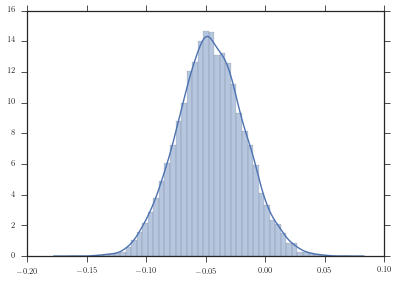

In [26]:
sn.distplot(lm_c12_decompir.chain['alpha'])

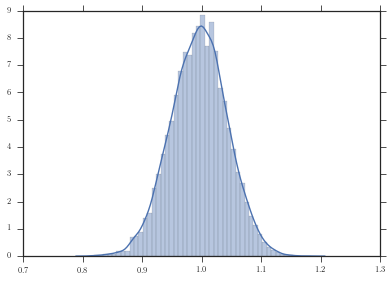

In [27]:
sn.distplot(lm_c12_decompir.chain['beta'])

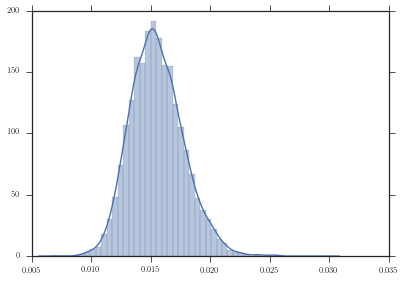

In [28]:
sn.distplot(lm_c12_decompir.chain['sigsqr'])

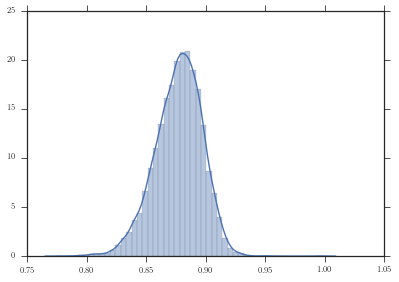

In [38]:
sn.distplot(lm_c12_decompir.chain['corr'])

In [33]:
lm_c12_dale14 = linmix.LinMix(bat_agn_frac['agnfracc12'].values, bat_agn_frac['agnfracd14'].values,
                                xsig=bat_casey['agn_frac_84'][bat_casey['agn_frac_16'] > 0].values-bat_casey['agn_frac'][bat_casey['agn_frac_16'] > 0].values,
                                ysig=bat_dale14_uncertain.loc[bat_agn_frac.index, 'agn_frac_total_84'].values-bat_agn_frac['agnfracd14'].values)
lm_c12_dale14.run_mcmc(silent=True)

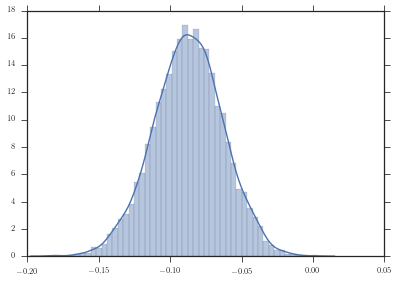

In [35]:
sn.distplot(lm_c12_dale14.chain['alpha'])

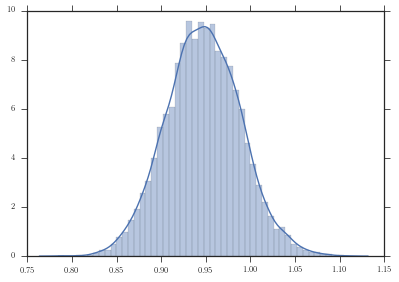

In [36]:
sn.distplot(lm_c12_dale14.chain['beta'])

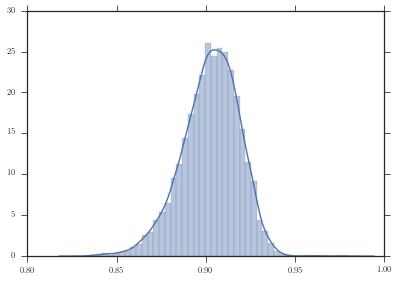

In [37]:
sn.distplot(lm_c12_dale14.chain['corr'])

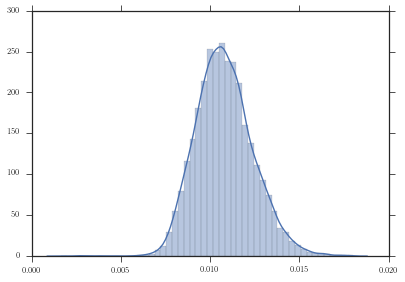

In [39]:
sn.distplot(lm_c12_dale14.chain['sigsqr'])

In [40]:
lm_decompir_dale14 = linmix.LinMix(bat_agn_frac['agnfracdecompir'].values, bat_agn_frac['agnfracd14'].values,
                                xsig=bat_decompir.loc[bat_agn_frac.index, 'agn_frac_84'].values-bat_agn_frac['agnfracdecompir'].values,
                                ysig=bat_dale14_uncertain.loc[bat_agn_frac.index, 'agn_frac_total_84'].values-bat_agn_frac['agnfracd14'].values)
lm_decompir_dale14.run_mcmc(silent=True)

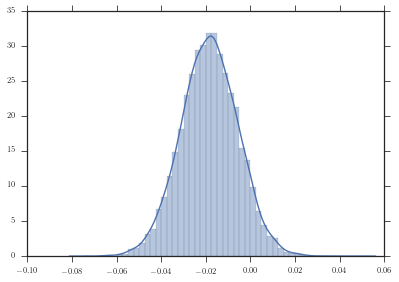

In [41]:
sn.distplot(lm_decompir_dale14.chain['alpha'])

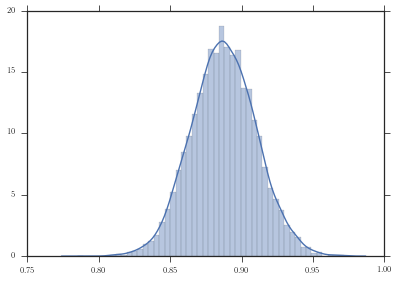

In [42]:
sn.distplot(lm_decompir_dale14.chain['beta'])

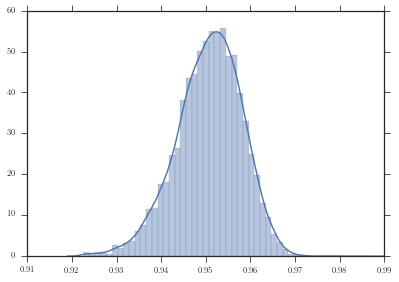

In [43]:
sn.distplot(lm_decompir_dale14.chain['corr'])

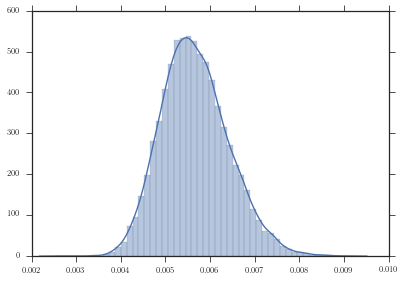

In [45]:
sn.distplot(lm_decompir_dale14.chain['sigsqr'])

In [30]:
bat_agn_frac[((bat_agn_frac['agnfracc12'] - bat_agn_frac['agnfracdecompir']) > 0.25) & (bat_agn_frac['agnfracc12_flag'] == 0)]

,agnfracc12,agnfracc12_err_up,agnfracc12_err_down,agnfracc12_flag,agnfracdecompir,agnfracdecompir_err_up,agnfracdecompir_err_down,agnfracdecompir_flag,agnfracd14,agnfracd14_err_up,agnfracd14_err_down,agnfracd14_flag
Name,,,,,,,,,,,,
2MASXJ09043699+5536025,0.668910,0.238968,0.326576,0,0.234512,0.160274,0.040028,0,0.2524,0.0503,0.040600,0
2MASXJ15115979-2119015,0.497963,0.163844,0.176859,0,0.246495,0.142735,0.031290,0,0.3152,0.0000,0.062800,0
CGCG341-006,0.471234,0.259117,0.207274,0,0.156192,0.140236,0.027281,0,0.1783,0.0335,0.036396,0
ESO490-IG026,0.723737,0.108176,0.115068,0,0.409019,0.033122,0.039432,0,0.2889,0.0542,0.013200,0
Fairall51,0.814050,0.103704,0.104763,0,0.404751,0.089434,0.048374,0,0.5126,0.1129,0.000000,0
MCG+02-57-002,0.672933,0.124374,0.129599,0,0.174492,NaN,NaN,-1,0.2289,0.0398,0.044000,0
MCG+04-22-042,0.792402,0.101898,0.102968,0,0.372395,0.094186,0.101479,0,0.7424,0.0000,0.000000,0
MCG-01-40-001,0.554277,0.114729,0.117221,0,0.111103,NaN,NaN,-1,0.1000,NaN,NaN,-1
NGC4507,0.696400,0.106458,0.108013,0,0.368064,0.286667,0.087217,0,0.4567,0.0000,0.084200,0


In [17]:
bat_casey.loc['NGC4941']

mdust                  7.382095
mdust_err_high         0.058916
mdust_err_low          0.063186
mdust_flag             0.000000
tdust                 14.298952
tdust_err_high         0.398577
tdust_err_low          0.363011
tdust_flag             0.000000
alpha                  1.502155
alpha_err_high         0.291247
alpha_err_low          0.243401
alpha_flag             0.000000
wturn                 65.134575
wturn_err_high        12.744267
wturn_err_low          9.781853
wturn_flag             0.000000
lir_total              9.107599
lir_total_err_high     0.021809
lir_total_err_low      0.021696
lir_total_flag         0.000000
lir_sf                 8.837748
lir_sf_err_high        0.020211
lir_sf_err_low         0.021991
lir_sf_flag            0.000000
lir_agn                8.775146
lir_agn_err_high       0.040232
lir_agn_err_low        0.045764
lir_agn_flag           0.000000
agn_frac               0.463512
agn_frac_err_high      0.028201
agn_frac_err_low       0.030280
agn_frac